In [21]:

import seaborn as sns
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [5]:
covid_dict = pd.read_excel('data_dictionary.xlsx')
covid_dict

,variable,value
0,SEX,"1 = Female, 2= Male, 99= Unknown"
1,HOSPITALIZED,"1 = NO, 2=YES, 99=Unknown"
2,intubated,"1=YES, 2=NO, 97=DOES NOT APPLY, 98=IGNORED, 99..."
3,PNEUMONIA,"1=YES, 2=NO, 97=DOES NOT APPLY, 98=IGNORED, 99..."
4,PREGNANCY,"1=YES, 2=NO, 97=DOES NOT APPLY, 98=IGNORED, 99..."
5,speaks_native_language,"1=YES, 2=NO, 97=DOES NOT APPLY, 98=IGNORED, 99..."
6,DIABETES,"1=YES, 2=NO, 97=DOES NOT APPLY, 98=IGNORED, 99..."
7,COPD,"1=YES, 2=NO, 97=DOES NOT APPLY, 98=IGNORED, 99..."
8,ASTHMA,"1=YES, 2=NO, 97=DOES NOT APPLY, 98=IGNORED, 99..."
9,INMUSUPR,"1=YES, 2=NO, 97=DOES NOT APPLY, 98=IGNORED, 99..."


In [6]:
covid_data = pd.read_csv('dataset.csv')
covid_data.head()

,ORIGIN,SECTOR,TREATMENT_LOCATION,SEX,BIRTHPLACE_LOCATION,PATIENT_LOCATION,MUNICIPALITY,HOSPITALIZED,ADMISSION DATE,DATE_OF_FIRST_SYMPTOM,...,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,CHRONIC_KIDNEY,TOBACCO,ANOTHER CASE,OUTCOME,MIGRANT,COUNTRY OF ORIGIN,ICU
0,OUTSIDE USMER,STATE,2,1,2,2,4,1,2020-04-22,2020-04-18,...,2,2,2,2,2,1,1,99,99,97
1,OUTSIDE USMER,STATE,15,2,15,15,33,2,2020-05-18,2020-05-15,...,2,2,2,1,2,2,1,99,99,2
2,OUTSIDE USMER,STATE,2,1,2,2,2,1,2020-05-22,2020-05-19,...,2,2,1,2,2,1,1,99,99,97
3,OUTSIDE USMER,STATE,15,2,9,15,87,1,2020-06-05,2020-06-04,...,2,2,2,2,1,1,1,99,99,97
4,OUTSIDE USMER,IMSS,25,2,25,25,6,1,2020-04-22,2020-04-18,...,2,2,2,2,2,99,1,99,99,97


In [7]:
#Cut the AGE into bins of [0,10,20,30,40,50,60,70,80,90,100]
pd.cut(covid_data['AGE'], bins=[0,10,20,30,40,50,60,70,80,90,100]).value_counts()


,count
AGE,
"(40, 50]",36266
"(30, 40]",35703
"(50, 60]",29401
"(20, 30]",23046
"(60, 70]",17453
"(70, 80]",8790
"(10, 20]",3774
"(80, 90]",3134
"(0, 10]",1512


<Axes: xlabel='AGE', ylabel='count'>

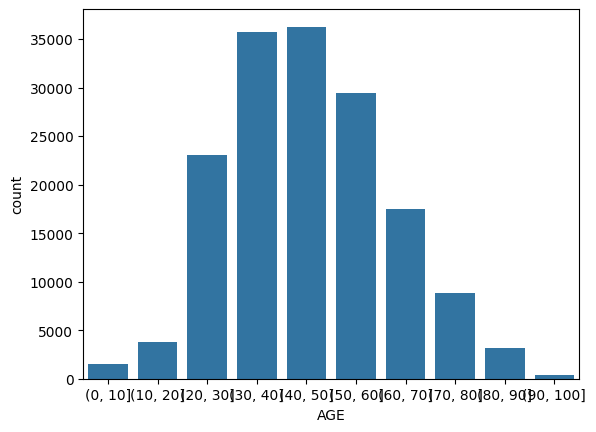

In [26]:
#plot a bar chart by sorting
sns.countplot(x=pd.cut(covid_data['AGE'], bins=[0,10,20,30,40,50,60,70,80,90,100]).sort_values())

<Axes: xlabel='AGE', ylabel='Count'>

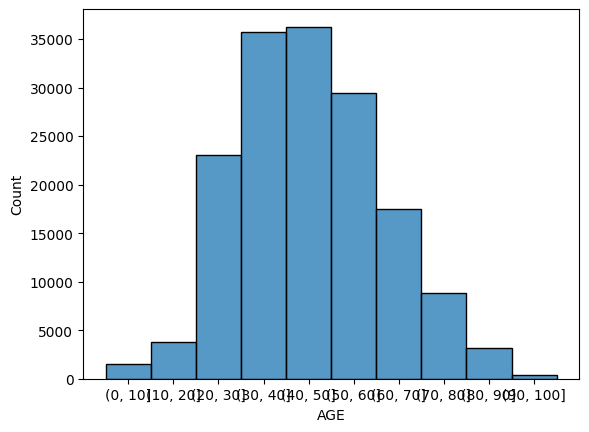

In [33]:
# Create age bins and count occurrences in each bin, then sort by bin
age_bins = pd.cut(covid_data['AGE'], bins=[0,10,20,30,40,50,60,70,80,90,100])
sorted_bins = age_bins.value_counts().sort_index()

# Plotting the sorted histogram
sns.histplot(x=sorted_bins.index.astype(str), weights=sorted_bins.values, discrete=True)

<Axes: xlabel='AGE', ylabel='count'>

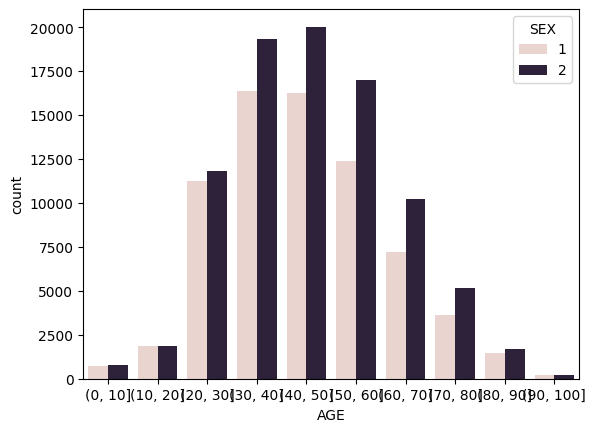

In [37]:
#Distribution of cases by gender & age group
sns.countplot(x=pd.cut(covid_data['AGE'], bins=[0,10,20,30,40,50,60,70,80,90,100]), hue=covid_data['SEX'])

<Axes: xlabel='INTUBATED', ylabel='count'>

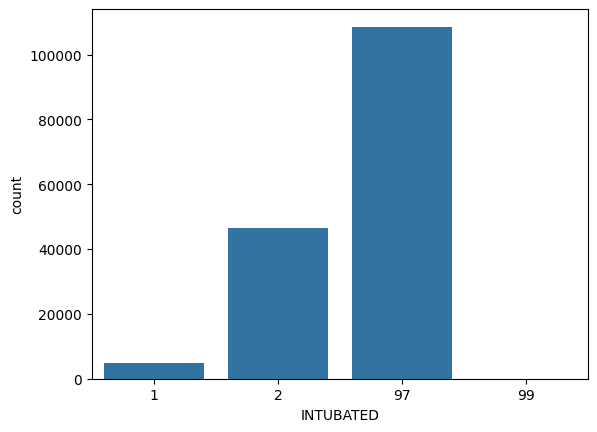

In [39]:
#bar chart based on How many patients required intubation?
sns.countplot(x=covid_data['INTUBATED'])

In [55]:
# Convert ICU column to numeric if necessary and replace any missing or non-numeric values
data['ICU'] = pd.to_numeric(data['ICU'], errors='coerce')

# List of relevant columns for correlation analysis
diseases = ['DIABETES', 'COPD', 'ASTHMA', 'INMUSUPR', 'HYPERTENSION', 'CARDIOVASCULAR',
            'OBESITY', 'CHRONIC_KIDNEY', 'TOBACCO']

# Ensure these columns are numeric
for col in diseases:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Compute correlation matrix between diseases and ICU admission
correlation_matrix = data[diseases + ['ICU']].corr()

# Extract correlations with ICU column
correlations_with_ICU = correlation_matrix['ICU'].drop('ICU')

# Display correlations with ICU admission
correlations_with_ICU

,ICU
DIABETES,-0.008068
COPD,-0.019711
ASTHMA,-0.023228
INMUSUPR,-0.023368
HYPERTENSION,-0.008134
CARDIOVASCULAR,-0.024000
OBESITY,-0.026576
CHRONIC_KIDNEY,-0.021919
TOBACCO,-0.022309


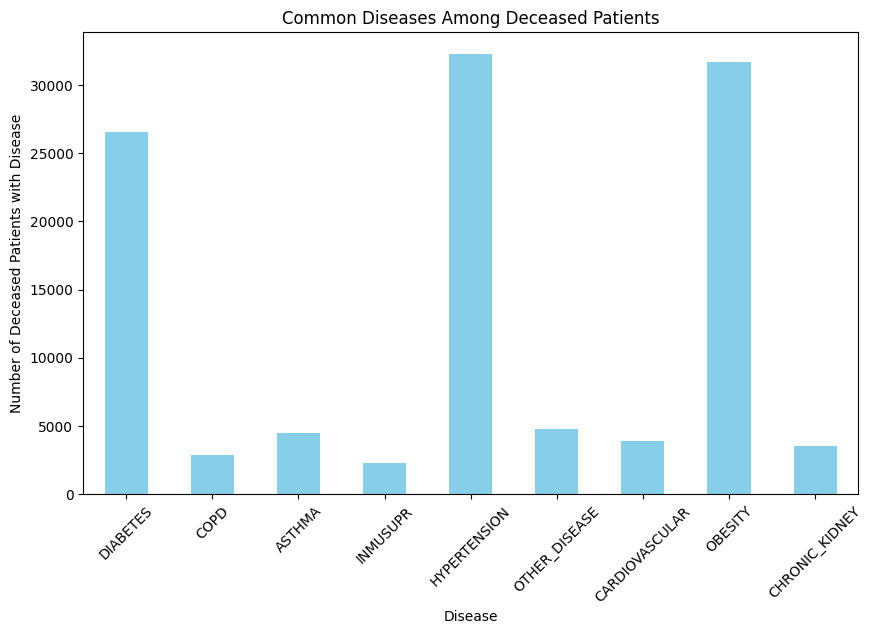

In [48]:
# Load the dataset
file_path = 'dataset.csv'
data = pd.read_csv(file_path)

deceased_data = data[data['OUTCOME'] == 1]

# Select disease-related columns
disease_columns = [
    'DIABETES', 'COPD', 'ASTHMA', 'INMUSUPR', 'HYPERTENSION',
    'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'CHRONIC_KIDNEY'
]

# Count the presence of each disease among deceased patients (assuming 1 indicates presence of disease)
disease_counts = deceased_data[disease_columns].apply(lambda x: (x == 1).sum())

# Plot the bar chart
plt.figure(figsize=(10, 6))
disease_counts.plot(kind='bar', color='skyblue')
plt.title('Common Diseases Among Deceased Patients')
plt.xlabel('Disease')
plt.ylabel('Number of Deceased Patients with Disease')
plt.xticks(rotation=45)
plt.show()